## Main EDA file

This notebook contains code to clean and organize raw data sourced from arXiv.org to prep it for time series analysis.

### Imports

In [1]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import inflect
from lda_model import simple_cleaner
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['non','also'])
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stephenreagin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stephenreagin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stephenreagin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stephenreagin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Ingestion

In [2]:
df1a = pd.read_csv('../datasets/arxiv_datasets/cs.AI_1.csv') # Artificial Intelligence 1
df1b = pd.read_csv('../datasets/arxiv_datasets/cs.AI_2.csv') # Artificial Intelligence 2
df2 = pd.read_csv('../datasets/arxiv_datasets/cs.CC.csv') # Computing and Computation
df3 = pd.read_csv('../datasets/arxiv_datasets/cs.CE.csv') # Computational Engineering, Finance, and Science
df4 = pd.read_csv('../datasets/arxiv_datasets/cs.CG.csv') # Computational Geometry
df5 = pd.read_csv('../datasets/arxiv_datasets/cs.CL.csv') # Computation and Language
df6a = pd.read_csv('../datasets/arxiv_datasets/cs.CV_1.csv') # Computer Vision and Pattern Recognition 1
df6b = pd.read_csv('../datasets/arxiv_datasets/cs.CV_2.csv') # Computer Vision and Pattern Recognition 2
df7 = pd.read_csv('../datasets/arxiv_datasets/cs.CY.csv') # Cybernetics
df8 = pd.read_csv('../datasets/arxiv_datasets/cs.DB.csv') # Databases
df9 = pd.read_csv('../datasets/arxiv_datasets/cs.DC.csv') # Distributed, Parallel, and Cluster Computing
df10 = pd.read_csv('../datasets/arxiv_datasets/cs.DL.csv') # Machine Learning
df11 = pd.read_csv('../datasets/arxiv_datasets/cs.DS.csv') # Data Structures and Algorithms
df12 = pd.read_csv('../datasets/arxiv_datasets/cs.ET.csv') # Emerging Technologies
df13 = pd.read_csv('../datasets/arxiv_datasets/cs.FL.csv') # Formal Languages and Automata Theory
df14 = pd.read_csv('../datasets/arxiv_datasets/cs.GL.csv') # General Literature
df15 = pd.read_csv('../datasets/arxiv_datasets/cs.GR.csv') # Graphics
df16 = pd.read_csv('../datasets/arxiv_datasets/cs.GT.csv') # Computer Science and Game Theory
df17 = pd.read_csv('../datasets/arxiv_datasets/cs.AR.csv') # Hardware Architecture
df18 = pd.read_csv('../datasets/arxiv_datasets/cs.HC.csv') # Human-Computer Interaction
df19 = pd.read_csv('../datasets/arxiv_datasets/cs.IR.csv') # Information Retrieval
df20 = pd.read_csv('../datasets/arxiv_datasets/cs.IT.csv') # Information Theory
df21 = pd.read_csv('../datasets/arxiv_datasets/cs.LO.csv') # Logic in Computer Science
df22a = pd.read_csv('../datasets/arxiv_datasets/cs.LG_1.csv') # Learning 1
df22b = pd.read_csv('../datasets/arxiv_datasets/cs.LG_2.csv') # Learning 2
df22c = pd.read_csv('../datasets/arxiv_datasets/cs.LG_3.csv') # Learning 3
df23 = pd.read_csv('../datasets/arxiv_datasets/cs.MA.csv') # Mathematical Aspects
df24 = pd.read_csv('../datasets/arxiv_datasets/cs.MS.csv') # Multimedia
df25 = pd.read_csv('../datasets/arxiv_datasets/cs.NI.csv') # Networking and Internet Architecture
df26 = pd.read_csv('../datasets/arxiv_datasets/cs.NE.csv') # Neural and Evolutionary Computing
df27 = pd.read_csv('../datasets/arxiv_datasets/cs.NA.csv') # Numerical Analysis
df28 = pd.read_csv('../datasets/arxiv_datasets/cs.OS.csv') # Operating Systems
df29 = pd.read_csv('../datasets/arxiv_datasets/cs.PF.csv') # Performance
df30 = pd.read_csv('../datasets/arxiv_datasets/cs.PL.csv') # Programming Languages
df31 = pd.read_csv('../datasets/arxiv_datasets/cs.RO.csv') # Robotics
df32 = pd.read_csv('../datasets/arxiv_datasets/cs.SI.csv') # Social and Information Networks
df33 = pd.read_csv('../datasets/arxiv_datasets/cs.SD.csv') # Sound
df34 = pd.read_csv('../datasets/arxiv_datasets/cs.SE.csv') # Software Engineering
df35 = pd.read_csv('../datasets/arxiv_datasets/cs.SC.csv') # Symbolic Computation
df36 = pd.read_csv('../datasets/arxiv_datasets/cs.SY.csv') # Systems and Control
df37 = pd.read_csv('../datasets/arxiv_datasets/cs.CR.csv') # Cryptography and Security
df38 = pd.read_csv('../datasets/arxiv_datasets/cs.DM.csv') # Discrete Mathematics

# Concatenating multiple DataFrames into one DataFrame
# The naming convention suggests that 'df1a' and 'df1b' represent different parts of the same category, 'cs.AI'
# Similarly, 'df22a', 'df22b', and 'df22c' represent different parts of the category 'cs.LG'
# These parts are split due to file size limitations
df = pd.concat([
    df1a, df1b, df2, df3, df4, df5, df6a, df6b, df7, df8, df9, df10,
    df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
    df21, df22a, df22b, df22c, df23, df24, df25, df26, df27, df28, df29, df30,
    df31, df32, df33, df34, df35, df36, df37, df38
]).reset_index(drop=True)
df.head()

,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
0,Domain-Independent Dynamic Programming,http://arxiv.org/abs/2401.13883v1,2024-01-25T01:48:09Z,2024-01-25T01:48:09Z,"For combinatorial optimization problems, mod...","['\nRyo Kuroiwa\n', '\nJ. Christopher Beck\n']",Manuscript submitted to JACM,NaN,http://arxiv.org/abs/2401.13883v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
1,Agent-based Simulation with Netlogo to Evaluat...,http://arxiv.org/abs/2401.14153v1,2024-01-25T13:05:06Z,2024-01-25T13:05:06Z,In this paper an agent-based simulation is d...,"['\nJ. Carbo\n', '\nN. Sanchez\n', '\nJ. M. Mo...",NaN,NaN,http://dx.doi.org/10.1057/jos.2016.10,cs.AI,['cs.AI'],10.1057/jos.2016.10,NaN,[],NaN
2,Automated legal reasoning with discretion to a...,http://arxiv.org/abs/2401.14511v1,2024-01-25T21:11:08Z,2024-01-25T21:11:08Z,Automated legal reasoning and its applicatio...,"['\nJoaquín Arias\n', '\nMar Moreno-Rebato\n',...",NaN,Artificial Intelligence and Law (2023),http://dx.doi.org/10.1007/s10506-023-09376-5,cs.AI,"['cs.AI', 'I.2.1']",10.1007/s10506-023-09376-5,NaN,[],NaN
3,Efficient Constraint Generation for Stochastic...,http://arxiv.org/abs/2401.14636v1,2024-01-26T04:00:07Z,2024-01-26T04:00:07Z,Current methods for solving Stochastic Short...,"['\nJohannes Schmalz\n', '\nFelipe Trevizan\n']",Extended version of AAAI 2024 paper,NaN,http://arxiv.org/abs/2401.14636v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
4,Synthetic Multimodal Dataset for Empowering Sa...,http://arxiv.org/abs/2401.14743v1,2024-01-26T10:05:41Z,2024-01-26T10:05:41Z,This paper presents a synthetic multimodal d...,"['\nTakanori Ugai\n', '\nShusaku Egami\n', '\n...","7 pages, 2 figures,4 tables",NaN,http://arxiv.org/abs/2401.14743v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN


### Data Pre-processing

In [3]:
# Remove duplicate rows, reset the index, subset the DF based on 3 columns
df = df.drop_duplicates().reset_index(drop=True)
df = df[['Title', 'Published', 'Summary']] 

print(df.shape)

(582340, 3)


In [ ]:
# Initialize WordNet Lemmatizer and load stopwords, required by simple_cleaner()
wnl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
#remove punctuation, convert to lowercase remove stopwords
df['cleaned_text'] = df['Summary'].apply(simple_cleaner) 

# inflect engine is required to convert words from singular to plural
p = inflect.engine()
def singular_maker(text):
    return " ".join([p.singular_noun(word) or word for word in text])

In [ ]:
# Convert 'Published' column to datetime and group by publication date and concatenate strings
df['pub_date'] = pd.to_datetime(df['Published']).dt.date
date_df = pd.DataFrame(df.groupby('pub_date')['cleaned_text'].sum()).reset_index()

# convert plural words to singular
date_df['cleaned_text'] = date_df['cleaned_text'].str.split().apply(singular_maker)

# Count the number of papers, tokens, unique per day
date_df['number_of_papers'] = [num for num in df.groupby('pub_date')['cleaned_text'].count()]
date_df['number_of_tokens'] = date_df['cleaned_text'].str.split().apply(len)
date_df['unique_tokens'] = date_df['cleaned_text'].str.split().apply(set).apply(len)

(582340, 3)


In [ ]:
print(f"Total tokens in dataset: {date_df['cleaned_text'].apply(len).sum()}")

date_df

In [6]:
# Save the DataFrame to a CSV file for quicker access
#date_df.to_csv("../datasets/lemmatized_date_df.csv", index=False)

In [12]:
#date_df = pd.read_csv('../datasets/lemmatized_date_df.csv')
da1 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df1.csv')
da2 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df2.csv')
da3 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df3.csv')
da4 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df4.csv')
da5 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df5.csv')
da6 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df6.csv')
da7 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df7.csv')
da8 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df8.csv')
da9 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df9.csv')
da10 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df10.csv')
da11 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df11.csv')
da12 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df12.csv')
da13 = pd.read_csv('../datasets/lemmatized_date_df/lemmatized_date_df13.csv')

date_df = pd.concat([da1, da2, da3, da4, da5,
          da6, da7, da8, da9, da10,
          da11, da12, da13])

date_df.reset_index(drop=True, inplace=True)

date_df['pub_date'] = pd.to_datetime(date_df['pub_date'])

date_df

,pub_date,cleaned_text,number_of_papers,number_of_tokens,unique_tokens,01,05,10,100,1000,...,yield better,yielded,yielding,young,youtube,zero,zeroshot,zeroshot learning,zerosum,zone
0,2012-09-12,backpropagation algorithm one widely used popu...,18,1678,940,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2012-09-13,theory random real number exceedingly welldeve...,12,1170,647,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-09-14,automatic text summarization preprocessing imp...,32,2969,1350,0,0,0,1,0,...,0,0,0,0,0,4,0,0,0,0
3,2012-09-15,several variant constraint satisfaction proble...,21,1766,822,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-09-16,present framework largescale distributed escie...,10,931,588,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,2024-01-27,diffusion planning recognized effective decisi...,181,19891,4333,0,0,6,1,0,...,0,2,1,0,0,0,2,0,0,1
4108,2024-01-28,predicting next activity ongoing proces one co...,187,20943,4537,0,1,3,1,0,...,0,0,2,0,0,0,4,2,0,0
4109,2024-01-29,answering complex logical query incomplete kno...,501,55825,8173,0,0,11,3,5,...,1,0,3,1,5,6,14,0,0,0
4110,2024-01-30,difficulty one key driver player engagement of...,507,54576,8034,0,0,9,7,0,...,2,0,6,0,7,5,23,3,0,8


### Tokens over time

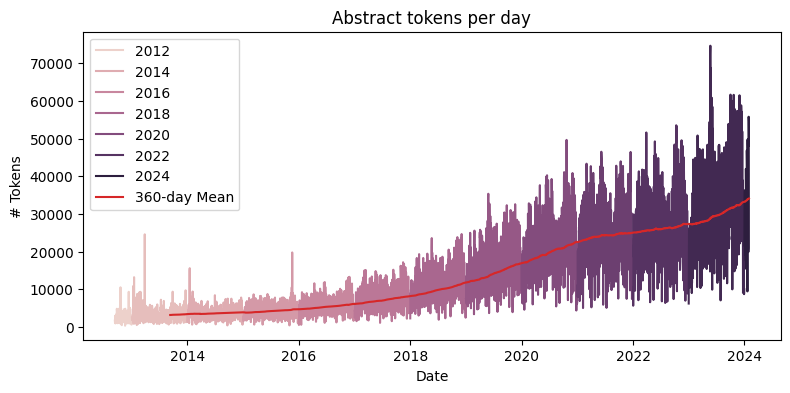

In [45]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['number_of_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['number_of_tokens'].rolling(360).mean(), x=date_df['pub_date'], label='360-day Mean')
plt.title('Abstract tokens per day')
plt.ylabel("# Tokens")
plt.xlabel("Date");

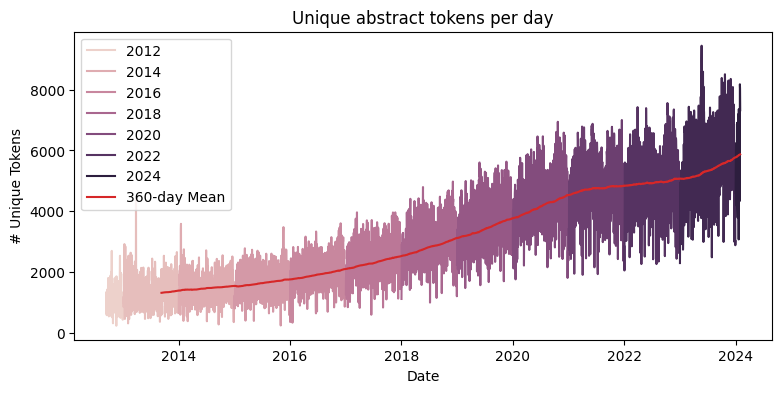

In [18]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['unique_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['unique_tokens'].rolling(360).mean(), x=date_df['pub_date'], label='360-day Mean')
plt.title('Unique abstract tokens per day')
plt.ylabel("# Unique Tokens")
plt.xlabel("Date");

Text(0.5, 1.0, 'Lexical diversity per day')

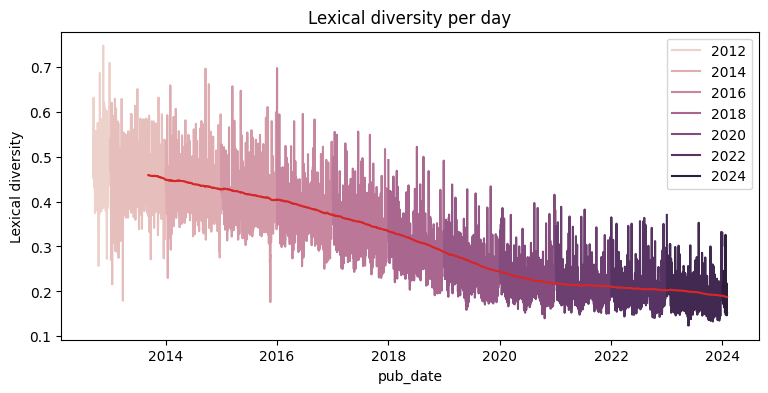

In [13]:
# Plot the line graph representing lexical diversity over time
plt.figure(figsize=(9, 4))
sns.lineplot(y=date_df['unique_tokens'] / date_df['number_of_tokens'], 
             x=date_df['pub_date'], 
             hue=pd.to_datetime(date_df['pub_date']).dt.year)

# Plot a rolling mean of lexical diversity for smoothing
sns.lineplot(y=(date_df['unique_tokens'] / date_df['number_of_tokens']).rolling(360).mean(), 
             x=date_df['pub_date'])

# Set ylabel and title for the plot
plt.ylabel("Lexical diversity")
plt.title('Lexical diversity per day')

### Some more relationships

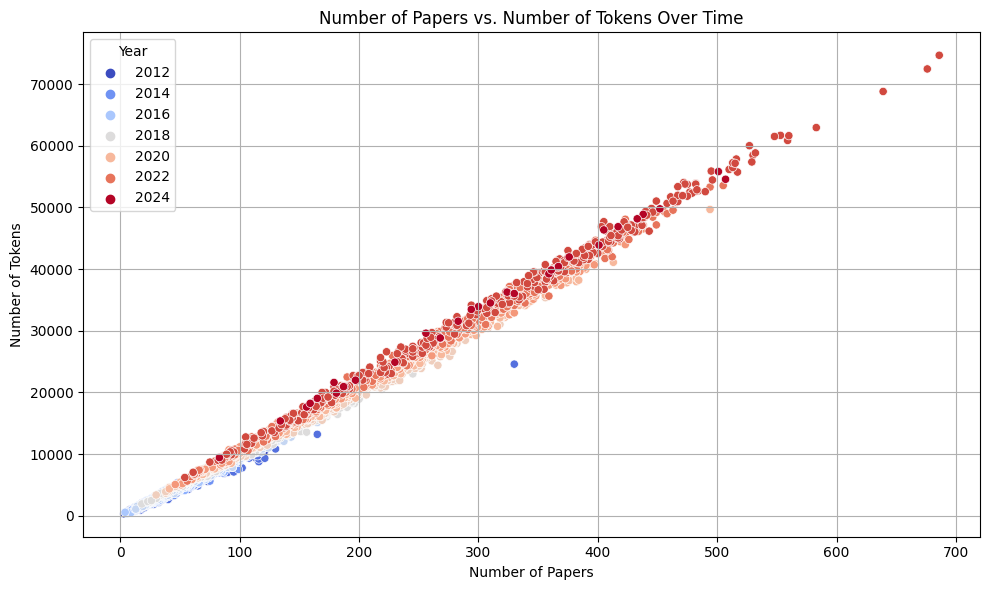

In [14]:
# Create the scatter plot
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x=date_df['number_of_papers'], 
                y=date_df['number_of_tokens'], 
                hue=pd.to_datetime(date_df['pub_date']).dt.year,
                palette='coolwarm')  

# Set plot title and labels
plt.title('Number of Papers vs. Number of Tokens Over Time')
plt.xlabel('Number of Papers')
plt.ylabel('Number of Tokens')
plt.legend(title='Year', loc='upper left')
plt.grid(True)  
plt.tight_layout()
plt.show()

<Axes: ylabel='pub_date'>

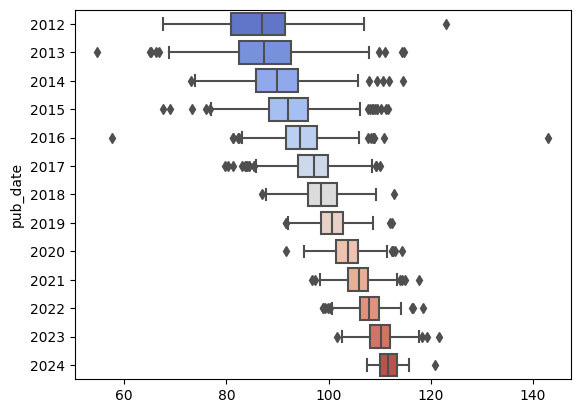

In [16]:
sns.boxplot(x=date_df['number_of_tokens'] / date_df['number_of_papers'],
            y=(pd.to_datetime(date_df['pub_date']).dt.year).astype('category'),
           palette='coolwarm')


<Axes: ylabel='Count'>

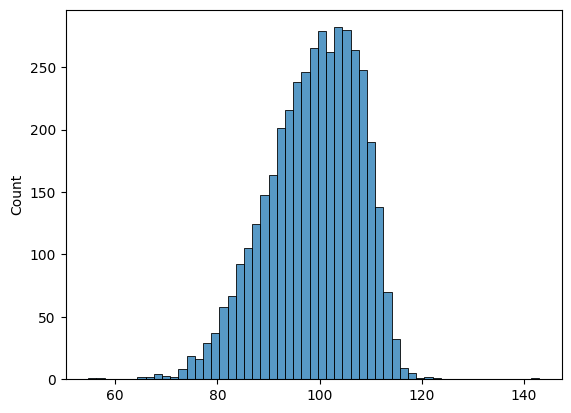

In [17]:
sns.histplot(date_df['number_of_tokens'] / date_df['number_of_papers'])

### Creating Word Vectors

We want to convert text strings into word vectors so we can tally the daily frequency of each token. But we're actually using 1- and 2-word token phrases called unigrams and bigrams, and we're only looking at those which have been used in at least 500 days of arXiv submissions.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [23]:
start_time = time.time()
#### turn the text strings into token vectors
#### but only if a token appears in at least 500 documents 
count_text_vectorizer = CountVectorizer(min_df=500, ngram_range=(1,2))
count_text_vectors = count_text_vectorizer.fit_transform(date_df['cleaned_text'])

print(time.time()-start_time)

print(f"Shape: {count_text_vectors.shape}\n")
count_text_vectorizer.get_feature_names_out()

60.04902410507202
Shape: (4112, 9684)



array(['01', '05', '10', ..., 'zeroshot learning', 'zerosum', 'zone'],
      dtype=object)

In [ ]:
date_df = pd.concat([date_df,pd.DataFrame(count_text_vectors.toarray(), columns=count_text_vectorizer.get_feature_names_out())],axis=1)

print(time.time()-start_time)

In [ ]:
date_df

In [ ]:
#plt.figure(figsize=(9,4))
#token_list = ['llm', 'recurrent', 'optimize', 'optimal', 'cnn', 'rnn', 'neighbor',
#             'architecture', 'lstm', 'transfer', 'transformer', 'quantum', 'learn', #'language',
#             'large', 'cpu', 'gpu', 'nvidia', 'intel', 'cryptocurrency','chatgpt', 'turing']
#for i in token_list:
#    sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean() / date_df[i].max(), alpha=0.7)
##plt.title('Use of the word "neural"')
##plt.axhline(3, ls='--')
##plt.legend(token_list)

In [19]:
def common_token_counter(clean_string):
    return [j for j,k in Counter(clean_string.split()).most_common(50)]

In [22]:
top_tokens_list = Counter(" ".join([i for i in date_df['cleaned_text'].apply(common_token_counter).str.join(sep=' ')]).split())

print(f"Number of total tokens: {len(top_tokens_list)}")

Number of total tokens: 3457


In [23]:
drop_list = ['pub_date','cleaned_text','number_of_papers','number_of_tokens','unique_tokens']
date_df.drop(columns=drop_list).sum().sort_values(ascending=False)[0:1000].index

Index(['model', 'method', 'datum', 'network', 'learning', 'algorithm',
       'problem', 'system', 'result', 'approach',
       ...
       'topology', 'bounded', 'static', 'circuit', 'transition', 'employed',
       'integration', 'around', 'simulated', 'assessment'],
      dtype='object', length=1000)

#### Taking a look at token evolution over time

Text(0.5, 1.0, 'Top 3000 Token Phrases, Normalized to Same Scale')

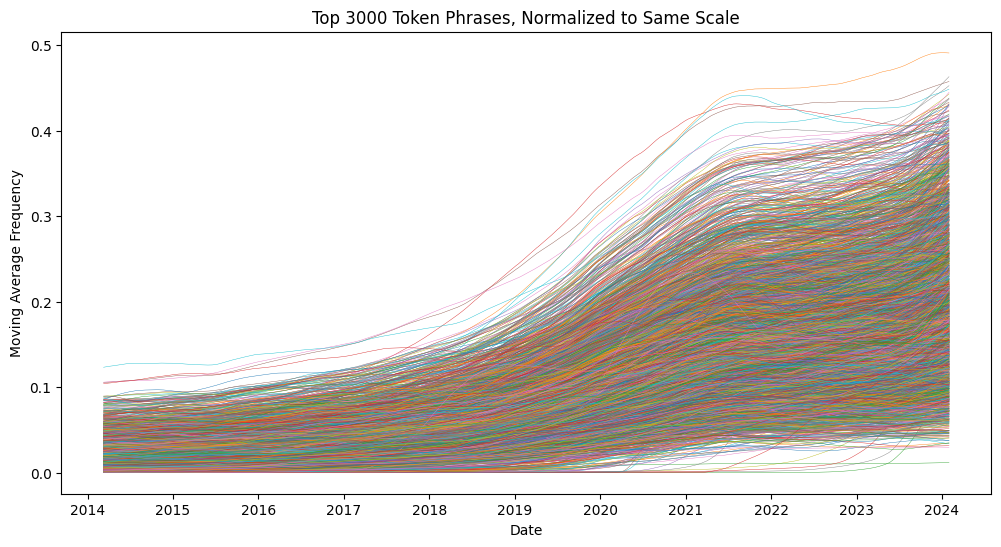

In [32]:
plt.figure(figsize=(12,6))
token_list = date_df.drop(columns=drop_list).sum().sort_values(ascending=False)[0:3000].index

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i]  / date_df[i].max()).rolling(360).mean().rolling(180).mean(), linewidth=0.3,)
    except:
        pass

plt.ylabel("Moving Average Frequency")
plt.xlabel("Date")
plt.title("Top 3000 Token Phrases, Normalized to Same Scale")

Text(0.5, 1.0, 'Top 3000 Token Phrases, Normalized and De-trended')

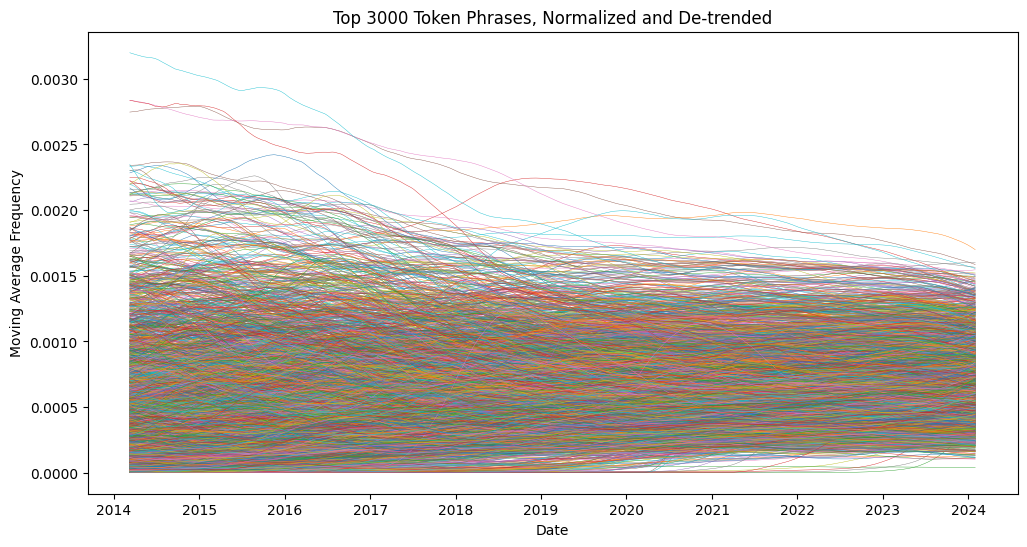

In [33]:
plt.figure(figsize=(12,6))
token_list = date_df.drop(columns=drop_list).sum().sort_values(ascending=False)[0:3000].index

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers'] / date_df[i].max()).rolling(360).mean().rolling(180).mean(), linewidth=0.3,)
    except:
        pass

plt.ylabel("Moving Average Frequency")
plt.xlabel("Date")
plt.title("Top 3000 Token Phrases, Normalized and De-trended")

In [ ]:
drop_list = ['pub_date','cleaned_text','number_of_papers','number_of_tokens','unique_tokens']


df_dict = {}
for col in date_df.drop(columns=drop_list).columns:
    df_dict[col] = (date_df[col] / date_df['number_of_papers']).rolling(360).mean().rolling(180).mean() / date_df[col].max()

moving_avg_df = pd.concat([date_df['pub_date'], pd.DataFrame(df_dict)], axis=1)[538:].reset_index(drop=True)
moving_avg_df = moving_avg_df.rename(columns={'pub_date': 'ds'})

In [ ]:
moving_avg_df

### We pull in dataframes throughout this notebook...

We originally constructed the dataframes and datasets inside this notebook directly, but that code was been commented out or ignored in subsequent notebooks runs. This is because it simply takes too long (~1hr) to run all the preprocessing steps.

Instead we're now pulling information from previously saved dataframes, such as the Moving Average dataframes below. Note that we split these into multiple CSV files in order to properly upload them to GitHub, so we have to stitch them back together in code.

In [25]:
ma1 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df1.csv')
ma2 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df2.csv')
ma3 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df3.csv')
ma4 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df4.csv')
ma5 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df5.csv')
ma6 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df6.csv')
ma7 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df7.csv')
ma8 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df8.csv')
ma9 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df9.csv')
ma10 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df10.csv')
ma11 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df11.csv')
ma12 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df12.csv')
ma13 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df13.csv')
ma14 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df14.csv')
ma15 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df15.csv')
ma16 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df16.csv')
ma17 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df17.csv')
ma18 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df18.csv')
ma19 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df19.csv')
ma20 = pd.read_csv('../datasets/moving_avg_df/moving_avg_df20.csv')

moving_avg_df = pd.concat([ma1, ma2, ma3, ma4, ma5,
          ma6, ma7, ma8, ma9, ma10,
          ma11, ma12, ma13, ma14, ma15,
          ma16, ma17, ma18, ma19, ma20,], axis=1)

In [27]:
#date_df.to_csv('../datasets/lemmatized_date_df.csv', index=False)
#moving_avg_df.to_csv('../datasets/lemmatized_moving_avg_df.csv', index=False)

In [ ]:
#https://stackoverflow.com/questions/45143450/how-to-fit-polynomial-to-a-time-series-data-in-python
plt.figure(figsize=(12,9))
x = [i for i in range(len(moving_avg_df))]

for word in moving_avg_df.drop(columns=['ds']).columns[:500]:
    y = moving_avg_df[word]
    
    curve = np.polyfit(x,y*1000, deg=7)
    #print(curve)
    p = np.poly1d( curve )
    sns.lineplot(x=x,y= p(x), alpha=0.3)

In [ ]:
plt.figure(figsize=(8,4))
x = [i for i in range(len(moving_avg_df))]

for word in ['llm', 'recurrent', 'optimize', 'optimal', 'cnn', 'rnn', 'neighbor',
#             'architecture', 'lstm', 'transfer', 'transformer', 'quantum', 'learn', #'language',
             ]:
    y = moving_avg_df[word]
    curve = np.polyfit(x,y, deg=7)
    #print(curve)
    p = np.poly1d( curve )
    plt.plot(x,y,p(x))

In [ ]:
plt.figure(figsize=(12,9))
x = [i for i in range(len(moving_avg_df))]
polynomial_dict = {}

for word in moving_avg_df.drop(columns=['ds']).columns:
    y = moving_avg_df[word]*1000
    polynomial_dict[word] = np.polyfit(x,y, deg=7)

In [ ]:
polynomial_df = pd.DataFrame(polynomial_dict).T.reset_index().rename(columns = {'index':'token', 0:'deg7', 1:'deg6', 2:'deg5', 3:'deg4',
                                                 4:'deg3', 5:'deg2', 6:'deg1', 7:'y_int'})

In [ ]:
sns.histplot(polynomial_df['y_int'])

In [ ]:
polynomial_df

In [ ]:
len(polynomial_df['positive_slope'])

### KNeighbors Clustering based on polynomial curves

In [ ]:
polynomial_df['positive_slope'] = polynomial_df['deg1'] > 0

In [ ]:
sns.pairplot(polynomial_df, hue='positive_slope')

### KMeans Clustering

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, MaxAbsScaler, PowerTransformer, Normalizer

In [ ]:
X = polynomial_df.drop(columns=['token', 'positive_slope'])

sc = QuantileTransformer()
X_sc = sc.fit_transform(X)
pd.DataFrame(X_sc, columns = X.columns)

In [ ]:
1 / np.log(np.abs(X)) * np.sign(X)

In [ ]:
sns.pairplot(pd.concat([pd.DataFrame(X_sc, columns = X.columns), polynomial_df['positive_slope']], axis=1), hue='positive_slope')

In [ ]:
k_clusters = KMeans(n_clusters=7,)

k_clusters.fit(X_sc)

In [ ]:
k_clusters.labels_

In [ ]:
polynomial_df['cluster'] = k_clusters.labels_

In [ ]:
polynomial_df

In [ ]:
#plt.figure(figsize=(32,32))
sns.pairplot(polynomial_df.drop(columns=['token']), hue='cluster')
#plt.savefig("clustered_pairplot2.png")

In [ ]:
cluster_dict = {}
for i in range(len(neighbors_df)):
    cluster_dict[neighbors_df['unique_id'][i]] = neighbors_df['cluster'][i]

In [ ]:
#temp_df = polynomial_df[polynomial_df['cluster']==0][['deg7','deg6','deg5','deg4','deg3','deg2','deg1','y_int']].reset_index(drop=True)
plt.figure(figsize=(12,9))
x = [i for i in range(len(moving_avg_df))]

for word in polynomial_df[polynomial_df['cluster']==6]['token']:
    y = moving_avg_df[word]
    
    curve = np.polyfit(x,y*1000, deg=2)
    p = np.poly1d( curve )
    sns.lineplot(x=x,y= p(x), linewidth=0.1, color='black')


### "Integral" Clustering

Polynomial clustering did not work very well, nor did statistical clustering. So instead we feature engineered a matrix that finds the "area" between every pair of time series curves, i.e. calculating the discrete integral via Riemann Sum.

The code is commented out below because it takes 3-4 hours to finish if you accidentally start running it.

But if you do choose to run it, we've left in some additional EDA code below to explore.

In [ ]:
integral_dict = {}

In [ ]:
%%time

#for token in moving_avg_df.drop(columns=['ds']).columns[7000:]:
#    integral_dict[token] = [sum(np.abs(moving_avg_df[token] - moving_avg_df[word])) for word in moving_avg_df.drop(columns=['ds']).columns]


In [ ]:
limited_df = moving_avg_df[:-392]

In [ ]:
%%time
#limited_integral_dict = {}
for token in moving_avg_df.drop(columns=['ds']).columns[8000:]:
    limited_integral_dict[token] = [sum(np.abs(limited_df[token] - limited_df[word])) for word in limited_df.drop(columns=['ds']).columns]


In [ ]:
pd.DataFrame(limited_integral_dict).to_csv('limited_integral_df.csv', index=False)

In [ ]:
%%time

#for token in moving_avg_df.drop(columns=['ds']).columns[0:10]:
#    limited_integral_dict[token] = [sum(np.abs(moving_avg_df[token] - moving_avg_df[word])) for word in moving_avg_df.drop(columns=['ds']).columns]


In [ ]:
#pd.DataFrame(integral_dict).to_csv('integral_dict.csv', index=False)

In [ ]:
#integral_df = pd.DataFrame(integral_dict)
limited_integral_df = pd.read_csv('limited_integral_df.csv')
integral_df = pd.read_csv('integral_dict.csv')
moving_avg_df = pd.read_csv('lemmatized_moving_avg_df.csv')

limited_integral_df

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = limited_integral_df

k_cluster_model = KMeans(n_clusters=50)
k_cluster_model.fit(X)

limited_integral_df['original_tokens'] = limited_integral_df.columns
limited_integral_df['k_cluster'] = k_cluster_model.labels_

In [ ]:
cluster_num = 35
#print([i for i in integral_df[integral_df['k_cluster']==cluster_num]['original_tokens']])
moving_avg_df[limited_integral_df[limited_integral_df['k_cluster']==cluster_num]['original_tokens']].plot.line(legend=False, linewidth=0.3)#, ylim=(0,.003))
moving_avg_df[limited_integral_df[limited_integral_df['k_cluster']==cluster_num]['original_tokens']].mean(axis=1).plot.line(color='blue', linestyle='-')#ylim=(0,.003))
plt.show()
print([i for i in limited_integral_df[limited_integral_df['k_cluster']==cluster_num]['original_tokens']])

In [ ]:
plt.figure(figsize=(12,8))
for i in range(0,50):
    moving_avg_df[limited_integral_df[limited_integral_df['k_cluster']==i]['original_tokens']].mean(axis=1).plot.line()

In [ ]:
#!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer

In [ ]:
%%time
visualization = KElbowVisualizer(estimator=k_cluster_model,k=(2,20))

visualization.fit(X)

In [ ]:
visualization.show()

In [ ]:
intercluster_vis = InterclusterDistance(KMeans(25))
intercluster_vis.fit(X)

In [ ]:
silhouette_vis = SilhouetteVisualizer(KMeans(20))

silhouette_vis.fit(X)

In [ ]:
#integral_df.to_csv('integral_cluster_all_data.csv')
limited_integral_df.to_csv('integral_cluster_limited_data.csv')

In [ ]:
limited_integral_df['original_tokens'] =  limited_integral_df['original_tokens'].str.replace(' ','.')
limited_integral_df[['original_tokens','k_cluster']].to_csv('limited_integral_cluster_labels.csv', index=False)

In [ ]:
limited_integral_df['original_tokens']